In [1]:
import random as rnd

In [34]:
# Just doing the readings hre and learning about random stuff - litreally random stuff haha

rnd.seed(69)

print(rnd.randbytes(1))

print(rnd.randrange(0,100,10))

a =[]

for _ in range(10):
   a.append(rnd.randrange(2,10, 2))

print(a)

print([rnd.randrange(1,3) for _ in range(10)])


def coinflip():
   flips = ["H", "T"]
   return flips[rnd.randrange(0,2)]

print ([coinflip() for _ in range(10)])

b'\xaf'
0
[2, 4, 2, 6, 6, 8, 8, 8, 8, 6]
[2, 1, 2, 2, 1, 2, 2, 1, 1, 1]
['T', 'H', 'H', 'H', 'H', 'T', 'H', 'T', 'T', 'H']


0.1606
0.0633
[0.0, 0.0, 0.0, 0.0, 0.0, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667, 0.0625, 0.058823529411764705, 0.05555555555555555, 0.05263157894736842, 0.05]


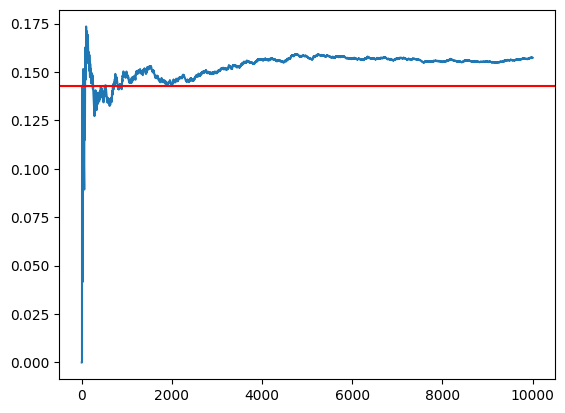

In [96]:
# Exercise 1.2 for fun
import matplotlib.pyplot as plt

n = 10000

def draw():
    return rnd.randrange(0,50)

a = [draw() for _ in range(n)]

# the probablity of the number divislbe by 7 is 
print(sum([1 for i in a if i % 7 == 0])/n)

# the probablity of the number divislbe by 7 and 3 is
print(sum([1 for i in a if i % 7 == 0 and i % 3 == 0])/n)

# graph of the numbers converging to a result

divisible = 0
divisibleOverTime = []

for i in range(n):
    sample = draw()
    # samples.append(sample)
    if ((sample % 7) == 0):
        divisible += 1

    # Need to add 1 to i because it starts at 0
    divisibleOverTime.append(divisible/(i+1)) 

plt.plot(range(1,n+1), divisibleOverTime)

# analytically the probablity of the number divislbe by 7 and 3 is 1/21
plt.axhline(y=1/7, color='r', linestyle='-')

print(divisibleOverTime[1:20])

# intresting how am I so off for n= 10000 as well the answer should indeed by 1/7 = 0.14285714285714285 but I am consistently getting 0.155

In [99]:
# More fun

def bernuli(p):
    return 1 if rnd.random() < p else 0

print([bernuli(0.9) for _ in range(10)])

# Exercise 3.1

def genBer(probabilities):
    # Ensure that the sum of probabilities equals 1 (or is very close to 1)
    assert abs(sum(probabilities) - 1) < 1e-9, "Probabilities must sum to 1. - just a way to make sure because floating point arithmetic is not perfect"
    
    # Draw a random number uniformly from the interval [0, 1)
    rand_num = rnd.random()
    
    cumulative_sum = 0
    for i, prob in enumerate(probabilities):
        cumulative_sum += prob
        if rand_num < cumulative_sum:
            return i

# Test cases
print("genBer([.1, .5, .4]) outputs:")
for _ in range(5):
    print(genBer([.1, .5, .4]))

print("genBer([.4, .2, .1, .3]) outputs:")
for _ in range(5):
    print(genBer([.4, .2, .1, .3]))

print("genBer([.3, .3, .1, .1, .1, .1]) outputs:")
for _ in range(5):
    print(genBer([.3, .3, .1, .1, .1, .1]))


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
genBer([.1, .5, .4]) outputs:
2
0
2
0
2
genBer([.4, .2, .1, .3]) outputs:
3
0
0
3
0
genBer([.3, .3, .1, .1, .1, .1]) outputs:
5
0
1
2
2


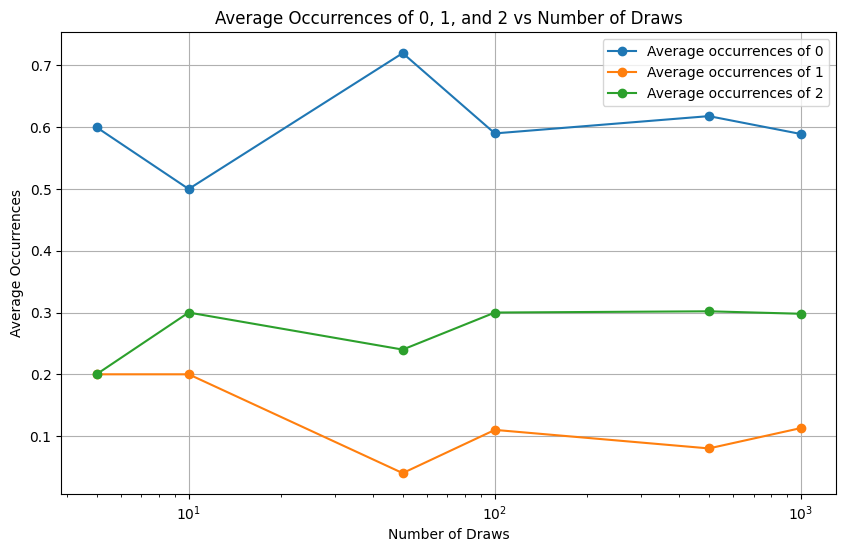

In [104]:
# 3.2 

import numpy as np

# Function to validate genBer by drawing n samples and calculating frequencies
def simulate_genBer(p, num_draws):
    results = [genBer(p) for _ in range(num_draws)]
    counts = [results.count(i) for i in range(len(p))]
    return counts

# Probabilities for testing
p = [.6, .1, .3] # the probablity list = or vector as they call it in the text book

# Number of draws for validation
draw_counts = [5, 10, 50, 100, 500, 1000]

# Store average occurrences for 0, 1, and 2
avg_0 = []
avg_1 = []
avg_2 = []

for num_draws in draw_counts:
    counts = simulate_genBer(p, num_draws)
    avg_0.append(counts[0] / num_draws)
    avg_1.append(counts[1] / num_draws)
    avg_2.append(counts[2] / num_draws)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(draw_counts, avg_0, label='Average occurrences of 0', marker='o')
plt.plot(draw_counts, avg_1, label='Average occurrences of 1', marker='o')
plt.plot(draw_counts, avg_2, label='Average occurrences of 2', marker='o')

plt.xlabel('Number of Draws')
plt.ylabel('Average Occurrences')
plt.title('Average Occurrences of 0, 1, and 2 vs Number of Draws')
plt.xscale('log')  # Log scale to better see the trend
plt.legend()
plt.grid(True)
plt.show()

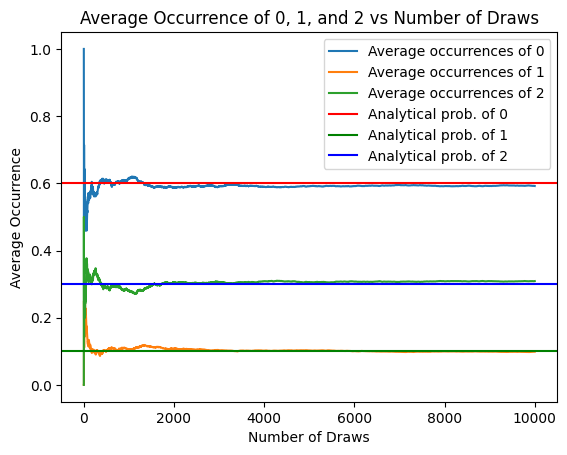

In [106]:
# 3.2 part 2

# Number of draws (same as the n in Section 1.2)
n = 10000

# Initialize counters for each outcome
count_0, count_1, count_2 = 0, 0, 0

# Lists to store average occurrences over time
avg_0_over_time = []
avg_1_over_time = []
avg_2_over_time = []

# Simulate the draws and track occurrences over time
for i in range(n):
    sample = genBer(p)
    
    if sample == 0:
        count_0 += 1
    elif sample == 1:
        count_1 += 1
    elif sample == 2:
        count_2 += 1

    # Append the average occurrences over time
    avg_0_over_time.append(count_0 / (i + 1))
    avg_1_over_time.append(count_1 / (i + 1))
    avg_2_over_time.append(count_2 / (i + 1))

# Plotting the results
plt.plot(range(1, n+1), avg_0_over_time, label='Average occurrences of 0')
plt.plot(range(1, n+1), avg_1_over_time, label='Average occurrences of 1')
plt.plot(range(1, n+1), avg_2_over_time, label='Average occurrences of 2')

# Analytically, the probability of drawing 0, 1, and 2 are 0.6, 0.1, and 0.3 respectively
plt.axhline(y=0.6, color='r', linestyle='-', label='Analytical prob. of 0')
plt.axhline(y=0.1, color='g', linestyle='-', label='Analytical prob. of 1')
plt.axhline(y=0.3, color='b', linestyle='-', label='Analytical prob. of 2')

# Labels and title
plt.xlabel('Number of Draws')
plt.ylabel('Average Occurrence')
plt.title('Average Occurrence of 0, 1, and 2 vs Number of Draws')
plt.legend()
plt.show()

Out of 10,000 samples, 5,075 are in the blue region under 
 	 the curve and 4,925 are above.
Hence fraction of the samples below the curve is 0.5075
Hence our estimate of the area under the curve is 0.25375


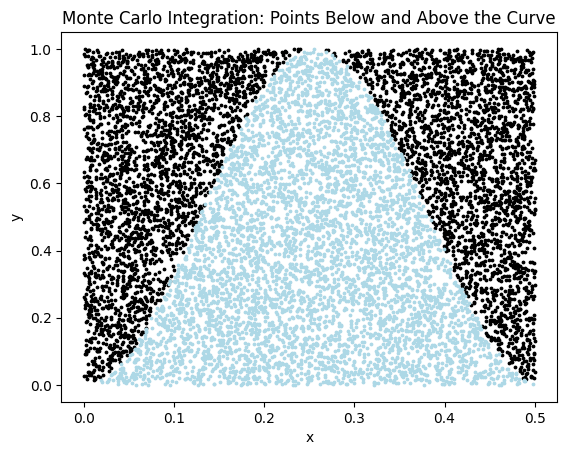

Analytical result for c = 2π: 0.25000


In [109]:
import sympy as sp

def f(x):
    c = 6.14159  # Set c to the given value
    return np.sin(c * x) ** 2

# Monte Carlo Integration
numberSamples = 10_000  # Number of random samples
samplesIn = []
samplesOut = []

# Generate random points and check if they fall below the curve
for k in range(numberSamples):
    x = 0.5 * rnd.random()  # x values are in [0, 1/2]
    y = rnd.random()        # y values are in [0, 1]
    if f(x) > y:  # Check if the point is below the curve f(x)
        samplesIn.append([x, y])  # Point is below the curve
    else:
        samplesOut.append([x, y])  # Point is above the curve

# Calculate the number of points in and out of the area under the curve
numIn = len(samplesIn)
numOut = len(samplesOut)

# Estimate the area under the curve
estimated_area = (0.5 * 1) * (numIn / numberSamples)  # The rectangle area is 0.5

# Print the results
print("Out of {:,} samples, {:,} are in the blue region under \n \t the curve and {:,} are above.".format(numberSamples, numIn, numOut))
print("Hence fraction of the samples below the curve is {:.4f}".format(numIn/numberSamples))
print("Hence our estimate of the area under the curve is {:.5f}".format(estimated_area))

# Scatter plot the points
x_samplesIn = [p[0] for p in samplesIn]
y_samplesIn = [p[1] for p in samplesIn]
x_samplesOut = [p[0] for p in samplesOut]
y_samplesOut = [p[1] for p in samplesOut]

plt.scatter(x_samplesOut, y_samplesOut, color='black', s=3)
plt.scatter(x_samplesIn, y_samplesIn, color='lightblue', s=3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Monte Carlo Integration: Points Below and Above the Curve")
plt.show()

# Now calculate the integral analytically using sympy for c = 2π
x = sp.Symbol('x')
c_pi = 2 * np.pi
integral_expr = sp.sin(c_pi * x)**2
analytical_area = sp.integrate(integral_expr, (x, 0, 1/2))

# Print the analytical result
print(f"Analytical result for c = 2π: {analytical_area.evalf():.5f}")


### Practice with Inclusion and Exclusion

1. **The probability that exactly two of \(A\), \(B\), \(C\) occur**:
   $$
   P(A \cap B \cap \overline{C}) + P(A \cap \overline{B} \cap C) + P(\overline{A} \cap B \cap C)
   $$
   This is the sum of the probabilities where two events occur and the third does not.

2. **The probability that exactly one of these events occurs**:
   $$
   P(A \cap \overline{B} \cap \overline{C}) + P(\overline{A} \cap B \cap \overline{C}) + P(\overline{A} \cap \overline{B} \cap C)
   $$
   This is the sum of the probabilities where only one event occurs.

3. **The probability that none of these events occur**:
   $$
   1 - P(A \cup B \cup C)
   $$
   Using inclusion-exclusion:
   $$
   P(\overline{A} \cap \overline{B} \cap \overline{C}) = 1 - \left[ P(A) + P(B) + P(C) - P(A \cap B) - P(A \cap C) - P(B \cap C) + P(A \cap B \cap C) \right]
   $$